In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [2]:
from keras.datasets import mnist
(x_train_image, y_train_label),\
(x_test_image, y_test_label) = mnist.load_data()

## preprocessing

In [16]:
# unfold
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')
# Normalize
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [17]:
# One-hot encoding
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

## Build Model

In [18]:
from keras.models import Sequential
from keras.layers import Dense

In [19]:
# Sequential model
model = Sequential()

In [20]:
model.add(Dense(units=256,
                input_dim=784,
                kernel_initializer='normal', ## Normal distribution 
                activation='relu'))

In [21]:
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

In [22]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


## Training

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [31]:
# Start training
train_history = model.fit(x=x_Train_normalize,
                          y=y_Train_OneHot, validation_split=0.2, # 0.8:training 0.2 validation
                          epochs=10, batch_size=200, verbose=2)  # 10 training periodic
# 48000 / 200 = 240 training times

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.4510 - acc: 0.8785 - val_loss: 0.2238 - val_acc: 0.9394
Epoch 2/10
 - 1s - loss: 0.1955 - acc: 0.9444 - val_loss: 0.1612 - val_acc: 0.9550
Epoch 3/10
 - 1s - loss: 0.1371 - acc: 0.9610 - val_loss: 0.1278 - val_acc: 0.9633
Epoch 4/10
 - 1s - loss: 0.1032 - acc: 0.9705 - val_loss: 0.1153 - val_acc: 0.9652
Epoch 5/10
 - 1s - loss: 0.0814 - acc: 0.9774 - val_loss: 0.1012 - val_acc: 0.9687
Epoch 6/10
 - 1s - loss: 0.0661 - acc: 0.9818 - val_loss: 0.0993 - val_acc: 0.9688
Epoch 7/10
 - 1s - loss: 0.0544 - acc: 0.9849 - val_loss: 0.0874 - val_acc: 0.9730
Epoch 8/10
 - 1s - loss: 0.0451 - acc: 0.9880 - val_loss: 0.0835 - val_acc: 0.9746
Epoch 9/10
 - 1s - loss: 0.0364 - acc: 0.9906 - val_loss: 0.0811 - val_acc: 0.9743
Epoch 10/10
 - 1s - loss: 0.0305 - acc: 0.9925 - val_loss: 0.0818 - val_acc: 0.9749


In [32]:
import matplotlib.pylab as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()


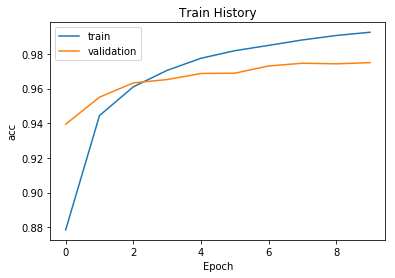

In [33]:
show_train_history(train_history, 'acc', 'val_acc')

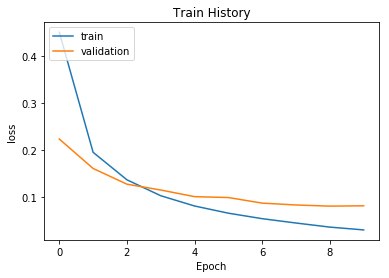

In [34]:
show_train_history(train_history, 'loss', 'val_loss')

## Prediction

In [35]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 29us/step

accuracy= 0.9773


In [36]:
prediction=model.predict_classes(x_Test)

In [37]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [40]:
# use plot_images_labels_prediction
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25 : num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1 + i)
        ax.imshow(images[idx], cmap='binary')
        title = "label=" + str(labels[idx])
        if len(prediction) > 0 :
            title += ",predict=" + str(prediction[idx])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx += 1
    plt.show()


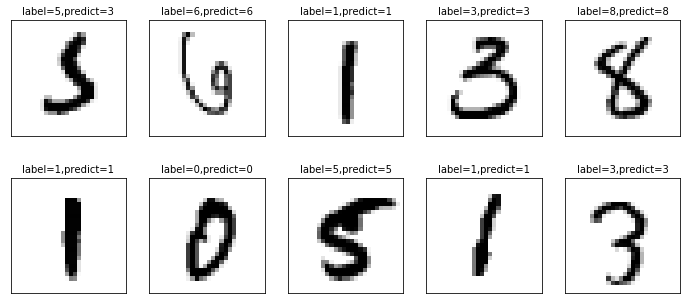

In [41]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=340)

## Confusion maxtrix

In [42]:
import pandas as pd
pd.crosstab(y_test_label, prediction,
            rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,969,0,0,2,1,1,2,1,1,3
1,0,1114,4,0,0,1,3,1,12,0
2,6,0,1006,3,1,0,2,5,9,0
3,0,0,2,988,0,4,0,4,5,7
4,1,0,3,0,959,0,4,2,1,12
5,2,0,0,10,1,861,5,2,7,4
6,7,2,1,1,3,3,938,0,3,0
7,2,1,9,5,0,0,0,997,3,11
8,6,0,4,5,4,1,2,2,947,3


In [43]:
# 5 : but is predicted to 3
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [46]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
1670,5,3
2035,5,3
2810,5,3
3902,5,3
5937,5,3
5972,5,3
9482,5,3


## Add Hidden Layer

In [48]:
model2 = Sequential()
model2.add(Dense(units=1000,
                 input_dim=784,
                 kernel_initializer='normal',
                 activation='relu'))
model2.add(Dense(units=10,
                 kernel_initializer='normal',
                 activation='softmax'))

In [50]:
print(model2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [52]:
model2.compile(loss='categorical_crossentropy',
               optimizer='adam', metrics=['accuracy'])

train_history2 = model2.fit(x=x_Train_normalize,
                            y=y_Train_OneHot, validation_split=0.2,
                            epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 5s - loss: 0.2905 - acc: 0.9162 - val_loss: 0.1536 - val_acc: 0.9562
Epoch 2/10
 - 4s - loss: 0.1150 - acc: 0.9670 - val_loss: 0.1210 - val_acc: 0.9637
Epoch 3/10
 - 4s - loss: 0.0738 - acc: 0.9792 - val_loss: 0.0923 - val_acc: 0.9734
Epoch 4/10
 - 5s - loss: 0.0519 - acc: 0.9854 - val_loss: 0.0809 - val_acc: 0.9750
Epoch 5/10
 - 4s - loss: 0.0360 - acc: 0.9903 - val_loss: 0.0831 - val_acc: 0.9753
Epoch 6/10
 - 4s - loss: 0.0245 - acc: 0.9940 - val_loss: 0.0730 - val_acc: 0.9778
Epoch 7/10
 - 4s - loss: 0.0185 - acc: 0.9952 - val_loss: 0.0727 - val_acc: 0.9779
Epoch 8/10
 - 4s - loss: 0.0134 - acc: 0.9969 - val_loss: 0.0746 - val_acc: 0.9781
Epoch 9/10
 - 4s - loss: 0.0098 - acc: 0.9981 - val_loss: 0.0725 - val_acc: 0.9792
Epoch 10/10
 - 4s - loss: 0.0070 - acc: 0.9991 - val_loss: 0.0777 - val_acc: 0.9777


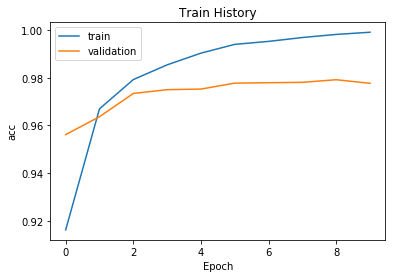

In [53]:
show_train_history(train_history2, 'acc', 'val_acc')

In [54]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=', scores[1])

10000/10000 [==============================] - 0s 32us/step

accuracy= 0.9773


## Dropout => solve overfitting

In [55]:
from keras.layers import Dropout
model3 = Sequential()

In [57]:
model3.add(Dense(units=1000,
                 input_dim=784,
                 kernel_initializer='normal',
                 activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

In [58]:
model3.compile(loss='categorical_crossentropy',
               optimizer='adam', metrics=['accuracy'])

train_history3 = model3.fit(x=x_Train_normalize,
                            y=y_Train_OneHot, validation_split=0.2,
                            epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 10s - loss: 0.3675 - acc: 0.8853 - val_loss: 0.1413 - val_acc: 0.9572
Epoch 2/10
 - 10s - loss: 0.1566 - acc: 0.9513 - val_loss: 0.0981 - val_acc: 0.9711
Epoch 3/10
 - 10s - loss: 0.1232 - acc: 0.9623 - val_loss: 0.0898 - val_acc: 0.9727
Epoch 4/10
 - 10s - loss: 0.0971 - acc: 0.9693 - val_loss: 0.0784 - val_acc: 0.9764
Epoch 5/10
 - 10s - loss: 0.0856 - acc: 0.9728 - val_loss: 0.0721 - val_acc: 0.9779
Epoch 6/10
 - 9s - loss: 0.0751 - acc: 0.9761 - val_loss: 0.0721 - val_acc: 0.9787
Epoch 7/10
 - 10s - loss: 0.0687 - acc: 0.9782 - val_loss: 0.0688 - val_acc: 0.9802
Epoch 8/10
 - 10s - loss: 0.0617 - acc: 0.9800 - val_loss: 0.0753 - val_acc: 0.9785
Epoch 9/10
 - 10s - loss: 0.0576 - acc: 0.9819 - val_loss: 0.0722 - val_acc: 0.9792
Epoch 10/10
 - 10s - loss: 0.0500 - acc: 0.9834 - val_loss: 0.0668 - val_acc: 0.9814


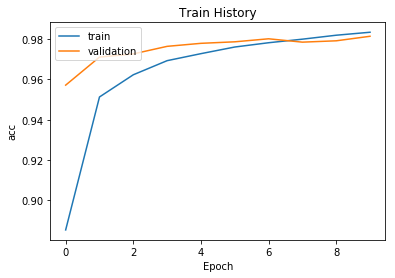

In [59]:
show_train_history(train_history3, 'acc', 'val_acc')

In [60]:
scores = model3.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=', scores[1])

10000/10000 [==============================] - 1s 92us/step

accuracy= 0.9825


## Multi Hidden Layer

In [61]:
model_2 = Sequential()
model_2.add(Dense(units=1000,
                 input_dim=784,
                 kernel_initializer='normal',
                 activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(units=1000,
                 kernel_initializer='normal',
                 activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

In [62]:
print(model_2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [63]:
model_2.compile(loss='categorical_crossentropy',
               optimizer='adam', metrics=['accuracy'])

train_history_2 = model_2.fit(x=x_Train_normalize,
                            y=y_Train_OneHot, validation_split=0.2,
                            epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 10s - loss: 0.3737 - acc: 0.8832 - val_loss: 0.1367 - val_acc: 0.9594
Epoch 2/10
 - 10s - loss: 0.1600 - acc: 0.9500 - val_loss: 0.1011 - val_acc: 0.9681
Epoch 3/10
 - 10s - loss: 0.1206 - acc: 0.9628 - val_loss: 0.0911 - val_acc: 0.9718
Epoch 4/10
 - 10s - loss: 0.0982 - acc: 0.9697 - val_loss: 0.0794 - val_acc: 0.9761
Epoch 5/10
 - 10s - loss: 0.0838 - acc: 0.9738 - val_loss: 0.0769 - val_acc: 0.9767
Epoch 6/10
 - 10s - loss: 0.0774 - acc: 0.9751 - val_loss: 0.0747 - val_acc: 0.9780
Epoch 7/10
 - 9s - loss: 0.0669 - acc: 0.9779 - val_loss: 0.0736 - val_acc: 0.9798
Epoch 8/10
 - 9s - loss: 0.0623 - acc: 0.9802 - val_loss: 0.0738 - val_acc: 0.9778
Epoch 9/10
 - 9s - loss: 0.0545 - acc: 0.9829 - val_loss: 0.0743 - val_acc: 0.9788
Epoch 10/10
 - 9s - loss: 0.0517 - acc: 0.9834 - val_loss: 0.0743 - val_acc: 0.9794


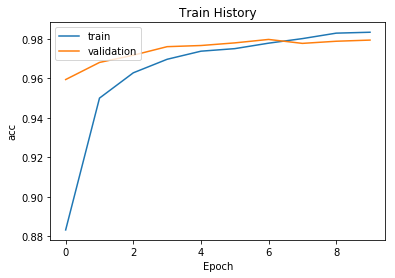

In [66]:
show_train_history(train_history_2, 'acc', 'val_acc')

In [67]:
scores = model_2.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=', scores[1])

10000/10000 [==============================] - 1s 89us/step

accuracy= 0.9813
